In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import mean_absolute_error , r2_score
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

**EDA**

In [2]:
df=pd.read_csv("/content/train.csv")
df.shape

(10407, 13)

In [3]:
df.head()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,0,100.0,0.841611,10.0,4.8,20.612526,11.08810,2.766,1.732,0.860,0.496070,0.91457,6.0
1,1,100.0,7.558488,10.0,4.8,20.298893,12.04083,2.755,1.631,0.910,0.492719,0.71760,6.5
2,2,76.0,8.885992,15.6,5.6,33.739258,12.08630,2.828,1.788,0.864,0.481478,1.50633,2.5
3,3,100.0,8.795296,10.0,4.8,20.213349,10.94850,2.648,1.626,0.936,0.489272,0.78937,6.0
4,4,116.0,9.577996,11.6,4.8,24.988133,11.82448,2.766,1.682,0.896,0.492736,1.86481,6.0


In [4]:
df.tail()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
10402,10402,128.0,7.558488,12.000000,4.000000,26.385218,11.330440,2.644000,1.631000,0.892000,0.496070,1.79607,4.0
10403,10403,30.0,1.743160,10.000000,5.333333,20.766935,14.163933,3.090000,1.556667,0.866667,0.480390,0.81480,5.0
10404,10404,196.0,30.920000,24.500000,5.500000,53.490297,10.074300,2.295000,1.545000,1.120000,0.469715,2.11540,1.8
10405,10405,38.0,1.553160,12.666667,4.666667,26.621687,11.290033,2.743333,1.756667,0.980000,0.486507,0.77755,6.0
10406,10406,288.0,24.655328,11.142857,4.571429,22.536126,10.960357,2.792143,1.772857,0.940000,0.493919,0.97737,6.5


In [5]:
df.columns.to_list()

['id',
 'allelectrons_Total',
 'density_Total',
 'allelectrons_Average',
 'val_e_Average',
 'atomicweight_Average',
 'ionenergy_Average',
 'el_neg_chi_Average',
 'R_vdw_element_Average',
 'R_cov_element_Average',
 'zaratio_Average',
 'density_Average',
 'Hardness']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10407 entries, 0 to 10406
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     10407 non-null  int64  
 1   allelectrons_Total     10407 non-null  float64
 2   density_Total          10407 non-null  float64
 3   allelectrons_Average   10407 non-null  float64
 4   val_e_Average          10407 non-null  float64
 5   atomicweight_Average   10407 non-null  float64
 6   ionenergy_Average      10407 non-null  float64
 7   el_neg_chi_Average     10407 non-null  float64
 8   R_vdw_element_Average  10407 non-null  float64
 9   R_cov_element_Average  10407 non-null  float64
 10  zaratio_Average        10407 non-null  float64
 11  density_Average        10407 non-null  float64
 12  Hardness               10407 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 1.0 MB


In [7]:
df.isna().sum()

id                       0
allelectrons_Total       0
density_Total            0
allelectrons_Average     0
val_e_Average            0
atomicweight_Average     0
ionenergy_Average        0
el_neg_chi_Average       0
R_vdw_element_Average    0
R_cov_element_Average    0
zaratio_Average          0
density_Average          0
Hardness                 0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
count,10407.00000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000
mean,5203.00000,128.053516,14.491342,17.033222,4.546789,37.507703,10.938308,2.607662,1.731330,0.944132,0.493349,2.132984,4.647126
std,3004.38646,224.123776,15.972877,10.468734,0.690864,26.012313,1.408276,0.334906,0.192481,0.180017,0.063080,1.936656,1.680525
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2601.50000,68.000000,7.558488,10.000000,4.000000,20.298893,10.590660,2.530000,1.672500,0.864000,0.476196,0.814800,3.000000
50%,5203.00000,100.000000,10.650000,12.600000,4.714286,26.203827,11.202760,2.706000,1.732727,0.915556,0.488550,1.351550,5.500000
75%,7804.50000,131.000000,16.676996,22.000000,4.800000,48.719500,11.670725,2.805000,1.800000,0.981667,0.496070,2.741550,6.000000
max,10406.00000,15300.000000,643.093804,67.000000,6.000000,167.400000,15.245810,3.443000,2.250000,1.615840,0.825990,10.970000,10.000000


<Axes: >

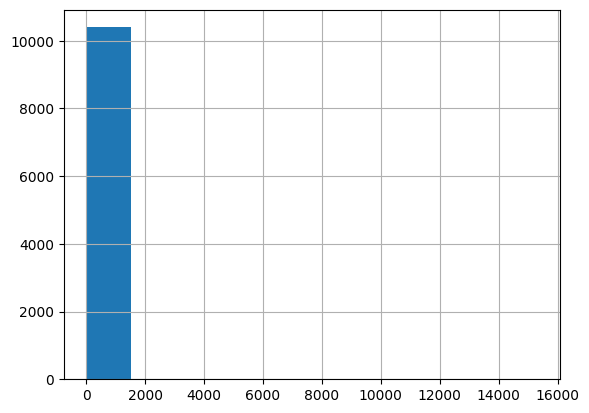

In [11]:
df['allelectrons_Total'].hist()

<Axes: >

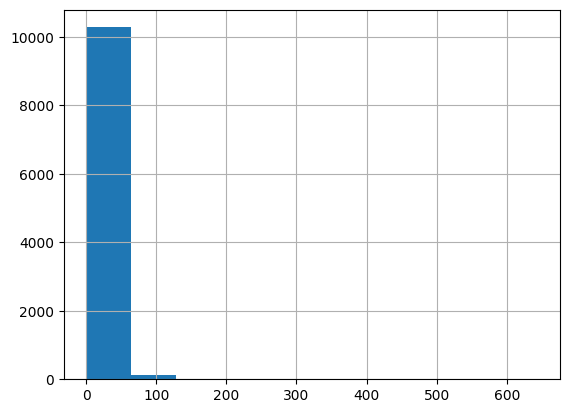

In [12]:
df['density_Total'].hist()

<Axes: >

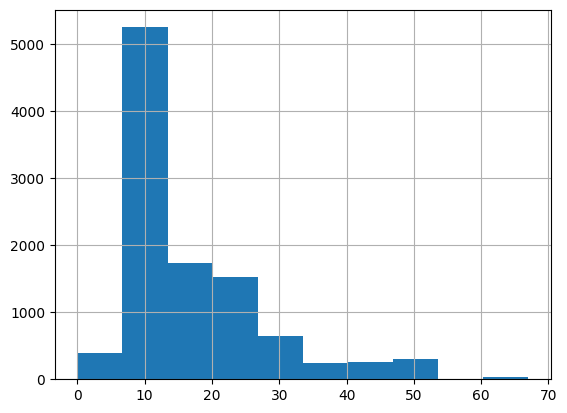

In [13]:
df['allelectrons_Average'].hist()

<Axes: >

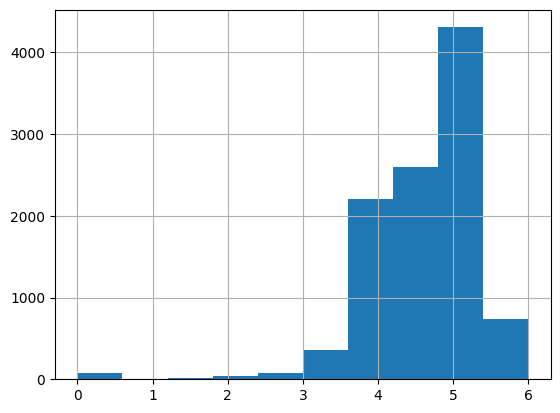

In [14]:
df['val_e_Average'].hist()

<Axes: >

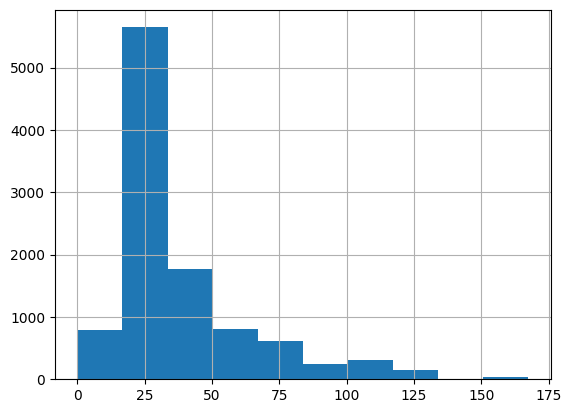

In [15]:
df['atomicweight_Average'].hist()

<Axes: >

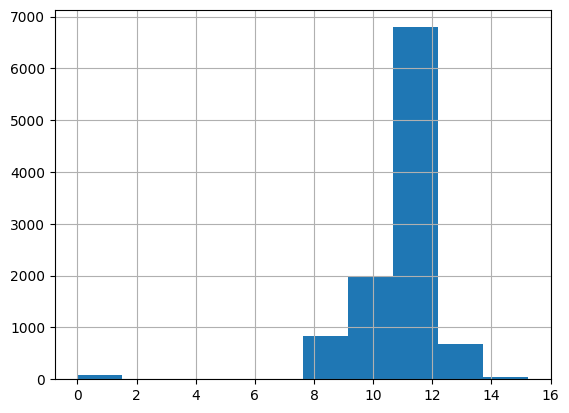

In [16]:
df['ionenergy_Average'].hist()

<Axes: >

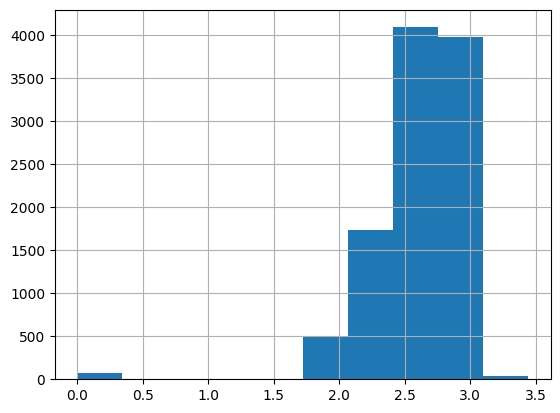

In [17]:
df['el_neg_chi_Average'].hist()

<Axes: >

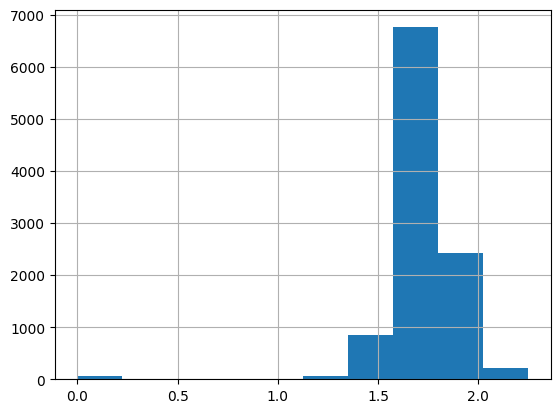

In [18]:
df['R_vdw_element_Average'].hist()

<Axes: >

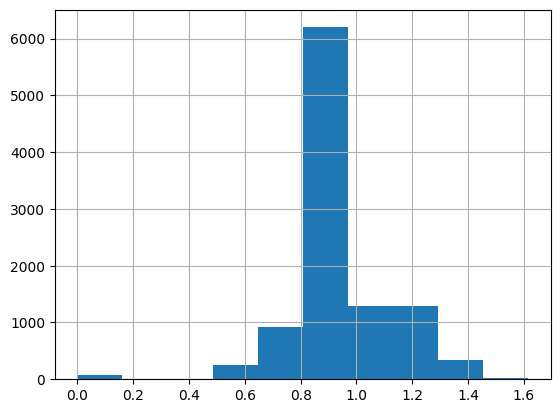

In [19]:
df['R_cov_element_Average'].hist()

<Axes: >

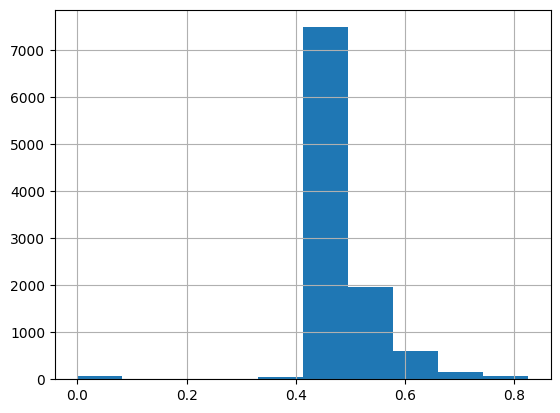

In [20]:
df['zaratio_Average'].hist()

<Axes: >

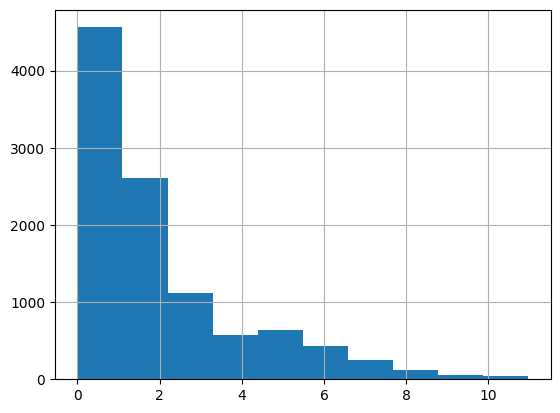

In [21]:
df['density_Average'].hist()

<Axes: >

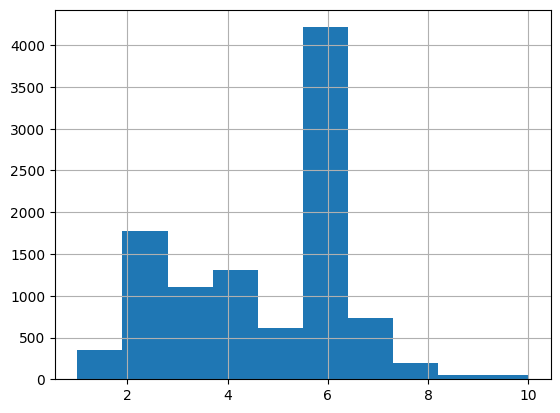

In [22]:
df['Hardness'].hist()

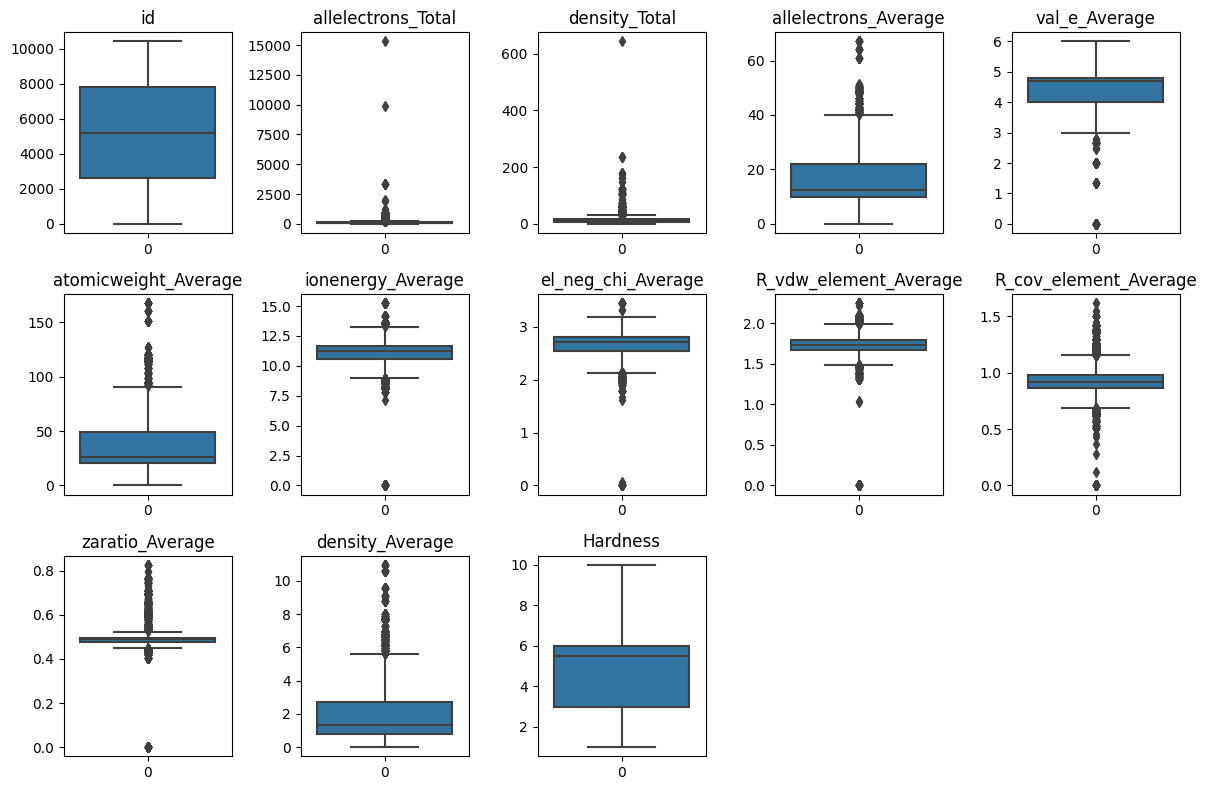

In [23]:
plt.figure(figsize=(12, 8))
for feature in df.columns.to_list():
    plt.subplot(3, 5, df.columns.to_list().index(feature) + 1)
    sns.boxplot(data=df[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()

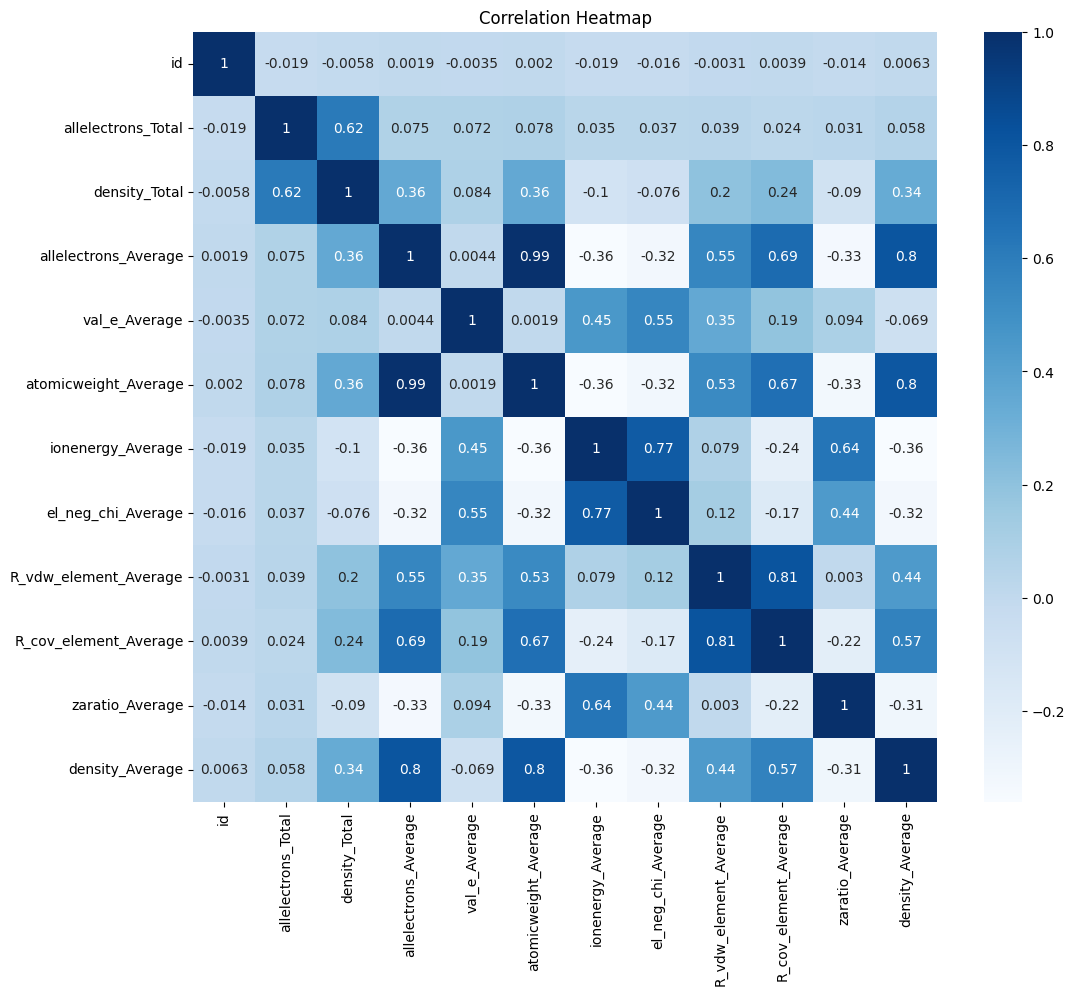

In [24]:
correlation_matrix = df.drop(columns='Hardness').corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

In [25]:
df.columns.tolist()

['id',
 'allelectrons_Total',
 'density_Total',
 'allelectrons_Average',
 'val_e_Average',
 'atomicweight_Average',
 'ionenergy_Average',
 'el_neg_chi_Average',
 'R_vdw_element_Average',
 'R_cov_element_Average',
 'zaratio_Average',
 'density_Average',
 'Hardness']

In [26]:
print(df['Hardness'].corr(df['atomicweight_Average']))

print(df['Hardness'].corr(df['density_Average']))

-0.4029480903545386
-0.36077994780940886


In [27]:
print(df['Hardness'].corr(df['allelectrons_Average']))

print(df['Hardness'].corr(df['density_Average']))

-0.40049583707006514
-0.36077994780940886


In [28]:
print(df['Hardness'].corr(df['allelectrons_Average']))

print(df['Hardness'].corr(df['atomicweight_Average']))

-0.40049583707006514
-0.4029480903545386


In [29]:
print(df['Hardness'].corr(df['zaratio_Average']))

print(df['Hardness'].corr(df['atomicweight_Average']))

0.05524788101979068
-0.4029480903545386


In [30]:
print(df['Hardness'].corr(df['density_Average']))

print(df['Hardness'].corr(df['atomicweight_Average']))

-0.36077994780940886
-0.4029480903545386


In [31]:
df.drop(columns= ['allelectrons_Average','density_Average'] , axis=1 , inplace= True)

**scal data**

In [32]:
X=df.drop('Hardness',axis=1)
y=df['Hardness']

In [33]:
scaler = StandardScaler()

# Fit the scaler to your data
scaler.fit(X)

# Transform your data
X_scaled = scaler.transform(X)

**spilt**

In [34]:
X_train , X_test , y_train , y_test = train_test_split(X_scaled ,y ,test_size=0.2 , random_state=42 )
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8325, 10)
y_train shape: (8325,)
X_test shape: (2082, 10)
y_test shape: (2082,)


**baseline**

In [35]:
y_mean = y_train.mean()
y_pred_baseline= [y_mean] * len(y_train)
print("Mean apt price:", y_mean)

print("Baseline MAE:", mean_absolute_error(y_train,y_pred_baseline))

Mean apt price: 4.65015015015015
Baseline MAE: 1.4952898123348572


**model**

In [38]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [39]:
reg_y_pred_test = model.predict(X_test)
y_pred_train=model.predict(X_train)
reg_acc_train = r2_score(y_train , y_pred_train)
reg_acc_test = r2_score(y_test , reg_y_pred_test)

print("Training Accuracy:", round(reg_acc_train, 4))
print("Test Accuracy:", round(reg_acc_test, 4))

Training Accuracy: 0.2437
Test Accuracy: 0.2238


In [40]:
rge =Ridge()

rge.fit(X_train , y_train)

Ridge()

In [41]:
print(rge.score(X_train , y_train))
print(rge.score(X_test , y_test))

0.24370076851565425
0.22383992595806435


In [42]:
xgb = XGBRegressor(n_estimators= 1000 , max_depth= 3 , learning_rate = 0.01)
xgb.fit(X_train , y_train);

In [43]:
print (xgb.score(X_train , y_train))
print (xgb.score(X_test , y_test))

0.49629772613292567
0.4458401964892629


In [44]:
test=pd.read_csv("/content/test.csv")

In [45]:
test.shape

(6939, 12)

In [46]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6939 entries, 0 to 6938
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     6939 non-null   int64  
 1   allelectrons_Total     6939 non-null   float64
 2   density_Total          6939 non-null   float64
 3   allelectrons_Average   6939 non-null   float64
 4   val_e_Average          6939 non-null   float64
 5   atomicweight_Average   6939 non-null   float64
 6   ionenergy_Average      6939 non-null   float64
 7   el_neg_chi_Average     6939 non-null   float64
 8   R_vdw_element_Average  6939 non-null   float64
 9   R_cov_element_Average  6939 non-null   float64
 10  zaratio_Average        6939 non-null   float64
 11  density_Average        6939 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 650.7 KB


In [47]:
scaler = StandardScaler()

# Fit the scaler to your data
scaler.fit(test)

# Transform your data
test_scaled = scaler.transform(test)

In [54]:
test_encoded = pd.get_dummies(test)

In [49]:
submisson =test[["id"]]

In [51]:
submisson.head()

,id
0,10407
1,10408
2,10409
3,10410
4,10411


from matplotlib import pyplot as plt
_df_0['id'].plot(kind='hist', bins=20, title='id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'id'}, axis=1)
              .sort_values('id', ascending=True))
  xs = counted['id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_2['id'].plot(kind='line', figsize=(8, 4), title='id')
plt.gca().spines[['top', 'right']].set_visible(False)

In [52]:
submisson.to_csv("submisson2.csv" , index = False)